<a href="https://colab.research.google.com/github/AnuSanal/Anu-Sanal/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df= pd.read_csv('BBC News.csv')

In [3]:
df.shape

(1490, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [5]:
df.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =178,test_size= 0.2)

NameError: ignored

In [7]:
df['category_id'] = df['Category'].factorize()[0]

In [8]:
df['category_id'][0:10]

0    0
1    0
2    0
3    1
4    0
5    2
6    3
7    4
8    0
9    4
Name: category_id, dtype: int64

In [9]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [10]:
category_id_df

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [11]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [12]:
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [13]:
df.sample(5, random_state=0)

,ArticleId,Text,Category,category_id
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4
354,1349,tory candidate quits over remark a conservativ...,politics,2
1227,1572,bath faced with tindall ultimatum mike tindall...,sport,3
907,1155,chancellor rallies labour voters gordon brown ...,politics,2
575,307,young debut cut short by ginepri fifteen-year-...,sport,3


In [14]:
df.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

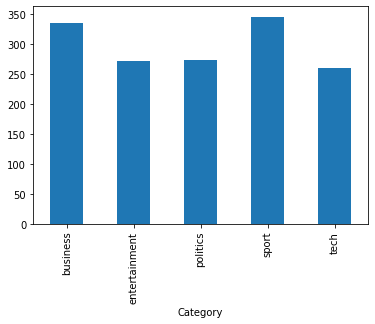

In [15]:
df.groupby('Category').category_id.count().plot.bar(ylim=0)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray() 
labels = df.category_id

In [17]:
features.shape

(1490, 9927)

In [18]:
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [19]:
sorted(category_to_id.items())

[('business', 0),
 ('entertainment', 4),
 ('politics', 2),
 ('sport', 3),
 ('tech', 1)]

In [20]:
from sklearn.feature_selection import chi2

N = 3  
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   
  indices = np.argsort(features_chi2[0])                                 
  feature_names = np.array(tfidf.get_feature_names())[indices]           
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) 
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'business':
  . Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
features_chi2

(array([0.13345481, 0.01563765, 0.00108776, ..., 0.00812363, 0.15434356,
        0.120306  ]),
 array([0.71487652, 0.9004835 , 0.97368962, ..., 0.92818297, 0.69441858,
        0.72870284]))

In [23]:
from sklearn.manifold import TSNE


SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [24]:
type(projected_features)

numpy.ndarray

In [25]:
my_id = 0 
projected_features[(labels[indices] == my_id).values]

array([[-4.13286686e+00, -9.20892525e+00],
       [ 4.44985104e+00,  1.30575931e+00],
       [ 7.39399910e+00, -1.22784491e+01],
       [ 1.59464378e+01, -4.11092138e+00],
       [ 1.44705992e+01, -2.87031727e+01],
       [ 1.26260519e+01, -2.34371829e+00],
       [-4.94337034e+00,  4.33154964e+00],
       [ 1.27926292e+01, -2.40895197e-01],
       [ 2.11887150e+01, -4.63770106e-02],
       [ 9.60490513e+00, -4.14878511e+00],
       [ 6.92501143e-02, -1.80034428e+01],
       [ 5.69708633e+00, -7.60759878e+00],
       [ 2.77500877e+01,  1.80671978e+01],
       [ 1.65667713e+00, -4.33841705e+00],
       [ 1.82398529e+01, -5.45124149e+00],
       [ 5.64697361e+00, -6.05977535e+00],
       [ 5.02676773e+00,  5.62201440e-02],
       [ 1.46825180e+01, -1.95173347e+00],
       [ 5.08124173e-01, -8.35781860e+00],
       [-1.57865810e+00,  4.48549318e+00],
       [ 1.05475798e+01,  7.59943342e+00],
       [-2.92681146e+00, -2.31089449e+00],
       [ 7.57700491e+00, -1.17490501e+01],
       [ 3.

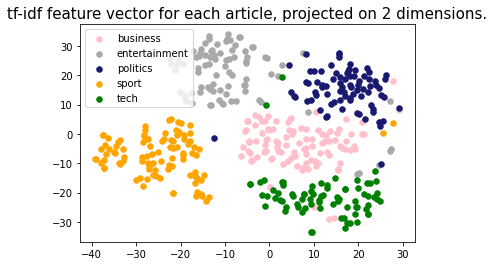

In [26]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']



for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [28]:
CV = 5  
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] 

In [29]:
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [30]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

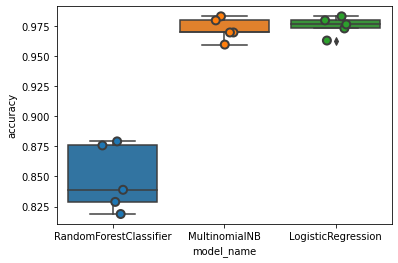

In [31]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [32]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.975168
MultinomialNB             0.972483
RandomForestClassifier    0.848322
Name: accuracy, dtype: float64

In [33]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.838926
1,RandomForestClassifier,1,0.818792
2,RandomForestClassifier,2,0.828859
3,RandomForestClassifier,3,0.875839
4,RandomForestClassifier,4,0.879195
5,MultinomialNB,0,0.969799
6,MultinomialNB,1,0.959732
7,MultinomialNB,2,0.983221
8,MultinomialNB,3,0.979866
9,MultinomialNB,4,0.969799


In [35]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

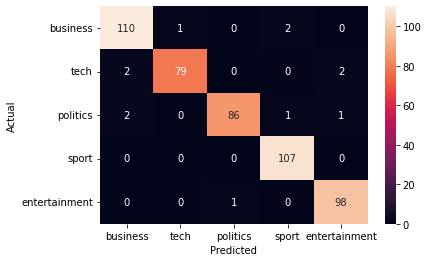

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [39]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['Text'])
      print('')

'tech' predicted as 'business' : 2 examples.


641    us woman sues over cartridges a us woman is su...
549    man auctions ad space on forehead a 20-year-ol...
Name: Text, dtype: object


'politics' predicted as 'business' : 2 examples.


962    hatfield executives go on trial engineering fi...
249    eu fraud clampdown urged eu member states are ...
Name: Text, dtype: object


'business' predicted as 'sport' : 2 examples.


61     arsenal  may seek full share listing  arsenal ...
728    christmas shoppers flock to tills shops all ov...
Name: Text, dtype: object


'tech' predicted as 'entertainment' : 2 examples.


1091    ultimate game  award for doom 3 sci-fi shooter...
1115    ultimate game  award for doom 3 sci-fi shooter...
Name: Text, dtype: object

In [40]:
model.fit(features, labels)

LogisticRegression(random_state=0)

In [41]:
model.coef_

array([[ 0.46799432,  0.01813872, -0.0715333 , ..., -0.03318298,
         0.0068823 , -0.02849203],
       [-0.02957523, -0.04366737, -0.01371468, ...,  0.00362675,
        -0.02877942, -0.02070068],
       [ 0.05006025, -0.05159908, -0.04674601, ..., -0.00638322,
        -0.03112648, -0.02362395],
       [-0.61687406, -0.04152046, -0.05352312, ...,  0.08450437,
         0.08574049,  0.09981232],
       [ 0.12839471,  0.11864819,  0.18551711, ..., -0.04856492,
        -0.03271689, -0.02699566]])

In [42]:
from sklearn.feature_selection import chi2

N = 5
for Category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])  
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'business':
  . Top unigrams:
       . firm
       . bank
       . company
       . shares
       . market
  . Top bigrams:
       . chief executive
       . analysts said
       . stock market
       . economic growth
       . oil prices
# 'entertainment':
  . Top unigrams:
       . film
       . music
       . singer
       . star
       . band
  . Top bigrams:
       . box office
       . los angeles
       . film festival
       . new york
       . big brother
# 'politics':
  . Top unigrams:
       . labour
       . mr
       . party
       . election
       . government
  . Top bigrams:
       . mr blair
       . prime minister
       . tony blair
       . general election
       . mr brown
# 'sport':
  . Top unigrams:
       . match
       . win
       . game
       . coach
       . cup
  . Top bigrams:
       . year old
       . australian open
       . champions league
       . world cup
       . grand slam
# 'tech':
  . Top unigrams:
       . users
       . software
       .